# Aprendizaje de Máquinas (Machine Learning)
## Clase 1: Los datos

### 1. Configuración del ambiente

Antes que empezar a trabajar, vamos a preparar el ambiente.
Para ello:
* Instalamos todos los paquetes que vamos a necesitar para trabajar. Lo hacemos utilizando el controlador de paquetes de Python ```pip```. Cada vez que usemos ```!```en la consola, le estamos diciendo al notebook que ejecute la instrucción en la consola del sistema, no en la de Python.
* Montamos Google Drive para guardar allí los archivos que descarguemos. En la consola nos va a aparecer una solicitud para hacer clic en una URL, loggearnos con nuestra cuenta de Google y colocar un código de autorización en una casilla.

In [ ]:
# instalamos el paquete para descargar archivos
!pip install wget

# montar la unidad de google drive
from google.colab import drive
drive.mount('/content/gdrive/')

# crear las carpetas necesarias
from os import makedirs
datasets_folder = '/content/gdrive/My Drive/Colab Notebooks/DUIA/2021/Machine Learning/'
makedirs(datasets_folder, exist_ok=True)

# importo numpy
import numpy as np
np.set_printoptions(precision=3, suppress=True) # y hago un truco para imprimir solamente 3 decimales

# importo una librería para utilizar valores aleatorios
import random
random.seed(10)
np.random.seed(10)

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


### 2. Datos necesarios para trabajar

Vamos a trabajar con un único data set de ejemplo, el [Boston House Price Dataset](https://www.kaggle.com/vikrishnan/boston-house-prices)

Si ejecutamos las rutinas a continuación vamos a descargar los datos automáticamente:

In [ ]:
# importamos el paquete para descargar archivos
import wget
from os import path

# establecemos las características del data set
housing_dataset = dict()
housing_dataset['url'] = 'https://ignaciorlando.github.io/datasets/housing_pandas.csv'
housing_dataset['extension'] = '.csv'
housing_dataset['filename'] = path.join(datasets_folder, 'housing_dataset' + housing_dataset['extension']) 
if not path.exists(housing_dataset['filename']):  # descargar solamente si no existe
  wget.download(housing_dataset['url'], housing_dataset['filename'])
else:
  print('El archivo {} ya existe.'.format(housing_dataset['filename']))


El archivo /content/gdrive/My Drive/Colab Notebooks/DUIA/2021/Machine Learning/housing_dataset.csv ya existe.


### 3. Explorar datos crudos

Supongamos que un corredor inmobiliario de Boston nos pide desarrollar un modelo de regresión que, dadas las características de una casa, determine automáticamente su precio. Para eso nos da un conjunto de datos, el Boston House Price Dataset, con información sobre una serie de residencias y sus precios asociados.

Vamos a seguir una serie de pasos para explorar las características de ese conjunto de datos (archivo ```housing_dataset.csv```). 

Lo primero es acceder a los datos y colocarlos en un formato que nos sea fácil de trabajar en Python. Existen 2 formas de abrir estos datos: usando [Pandas](https://pandas.pydata.org/), o usando [Numpy](https://numpy.org/):
* Pandas es una librería para hacer análisis de datos en Python, muy cómoda, pensada para datos en forma de tablas. El objeto central con el que trabaja es el ```DataFrame```, algo así como una "base de datos" en donde cada registro tiene un índice (que puede ser o un número o una columna de la tabla), y una serie de columnas (que en nuestro caso serían las features).
* NumPy es una librería para trabajo con matrices, algo así como un "Matlab" para Python. Como los datos con los que trabajamos en machine learning se modelan en tensores, matrices o vectores, suele ser muy útil usar esta librería también.

Vamos a abrir los datos con Pandas, jugar un ratito con eso, y después tirarnos directamente a usar NumPy. Probablemente volvamos a usar Pandas cuando necesitemos hacer algo más fácil:

In [ ]:
import pandas as pd

# abrimos el archivo usando una función específica de pandas
raw_dataset_dataframe = pd.read_csv(housing_dataset['filename'])
raw_dataset_dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Vamos a analizar el contenido de lo que acabamos de abrir, antes de avanzar:
* En negrita, a la izquierda, vemos el índice de cada registro. En este caso, no es más que su número de fila
* Arriba del todo, vemos los nombres de cada columna. Estos nombres figuran en la primera fila del archivo (lo que llamamos "header") e indican de qué se trata cada feature.

Vemos, también, que tenemos un total de 506 filas, y que hay 14 features por muestra. 

Lo ideal antes de seguir es verificar si tenemos valores de variable nulos, y establecer la acción correctiva que vamos a aplicar de llegar a ocurrir. En nuestro caso, si encontramos nulos vamos a eliminar el registro.



In [ ]:
# obtenemos una tabla booleana con True donde hay valores nulos
is_nan = raw_dataset_dataframe.isnull()
# chequeamos qué filas tienen valores nulos
row_has_nan = is_nan.any(axis=1)
# nos quedamos con esas filas
rows_with_nan = raw_dataset_dataframe[row_has_nan]
# imprimimos
rows_with_nan

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


Vemos por suerte que no teníamos ningún valor nulo. Si lo hubiéramos tenido, lo que tendríamos que hacer es algo como:

In [ ]:
# nos quedamos con las filas que no tienen nans
raw_dataset_dataframe = raw_dataset_dataframe[row_has_nan == False]
raw_dataset_dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


El siguiente paso antes de avanzar es chequear con qué características contamos. En particular, queremos: (i) interpretar las características, (ii) identificar características que puedan introducir algún [sesgo en nuestros algoritmos](https://dzone.com/articles/mitigating-biases-in-machine-learning-data-sets), (iii) aplicar acciones correctivas.

Según la inmobiliaria (a.k.a. el sitio que libera el dataset), cada columna de nuestro conjunto de datos representa las siguientes features:

    - CRIM     tasa de criminalidad per cápita por ciudad
    - ZN       proporción de tierra residencial (dividida en zonas para lotes de más de 25.000 pies cuadrados)
    - INDUS    proporción de negocios no minoristas (medida en acres por ciudad)
    - CHAS     límite con el río Charles (= 1 si limita; 0 si no)
    - NOX      concentración de óxido nítrico (partes por 10 millones)
    - RM       cantidad promedio de habitaciones por vivienda
    - AGE      proporción de unidades ocupadas por sus propietarios construidas antes de 1940
    - DIS      distancias ponderadas a cinco centros de empleo de Boston
    - RAD      índice de accessibilidad a carreteras radiales
    - TAX      tasa de impuesto a la propiedad de valor total por U$D 10.000
    - PTRATIO  tasa alumno/profesor por localidad
    - B        1000(Bk - 0.63)^2, donde Bk es la proporción de habitantes de raza negra que viven en la zona
    - LSTAT    % de habitantes de clase social baja
    - MEDV     Valor medio de vivienda (en miles de dólares)

Si analizamos los tags, vamos a ver algunas variables que definitivamente necesitan que metamos mano:

* La columna identificada como **'B'** es una feature generada mediante una ecuación que depende de una variable 'Bk', que es *la proporción de habitantes de raza negra que viven en la zona*. Esta variable, si la mantuviéramos, nos introduciría un [sesgo racista en nuestro algoritmo](https://www.youtube.com/watch?v=6Uao14eIyGc): queremos contar con modelos capaces de predecir de forma precisa el precio de una casa, pero sin reproducir prácticas humanas que sabemos que están equivocadas. Con lo cual, una primera acción correctiva a aplicar para curar nuestros datos es **eliminar esta variable**. 

* De manera similar, la feature identificada como **'LSTAT'** cuantifica el porcentaje de la población local que corresponde a una clase social baja. Si mantuviéramos esta feature, el precio estimado de las casas estaría vinculándose a esta variable, y por consiguiente reproduciría otro bias. Nuevamente, la acción correctiva es **eliminar esta variable**.

* Finalmente, tenemos las etiquetas (**'MEDV'**, el valor de las casas) mezcladas con las features. La acción correctiva es **separar esta variable**.

Aplicamos entonces las acciones correctivas que ya establecimos:

In [ ]:
# definimos un diccionario con tags para las features que vamos a mantener y sus
# descriptiones
feature_labels = dict()
feature_labels['CRIM']='tasa de criminalidad per cápita por ciudad'
feature_labels['ZN']='proporción de tierra residencial (dividida en zonas para lotes de más de 25.000 pies cuadrados)'
feature_labels['INDUS']='proporción de negocios no minoristas (medida en acres por ciudad)'
feature_labels['CHAS']='límite con el río Charles (= 1 si limita; 0 si no)'
feature_labels['NOX']='concentración de óxido nítrico (partes por 10 millones)'
feature_labels['RM']='cantidad promedio de habitaciones por vivienda'
feature_labels['AGE']='proporción de unidades ocupadas por sus propietarios construidas antes de 1940'
feature_labels['DIS']='distancias ponderadas a cinco centros de empleo de Boston'
feature_labels['RAD']='índice de accessibilidad a carreteras radiales'
feature_labels['TAX']='tasa de impuesto a la propiedad de valor total por U$D 10.000'
feature_labels['PTRATIO']='tasa alumno/profesor por localidad'
housing_dataset['feature-labels'] = feature_labels

# recuperamos únicamente las columnas que nos interesa mantener como features
X_df = raw_dataset_dataframe.filter(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO'])
# y armamos el arreglo de etiquetas
y_df = raw_dataset_dataframe.filter(['MEDV'])

Vamos a ver qué tenemos en ```X_df``` ahora:

In [ ]:
X_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0


Se ve claramente que las columnas que queríamos sacar ya desaparecieron. Ahora vamos a ver qué nos quedó en y:

In [ ]:
y_df

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


De igual forma, vemos que en ```y_df``` solamente nos quedaron los valores de nuestra variable objetivo.

Finalmente, lo que vamos a hacer es generarnos estructuras Numpy, con los valores que tenemos en ```X_df``` y en ```y_df```. Es tan simple como hacer:



In [ ]:
# pasamos los dataframes a Numpy
X = X_df.to_numpy()
y = y_df.to_numpy()
# chequeamos los tamaños de nuestros nuevos conjuntos
print('X size: {}'.format(X.shape))
print('y size: {}'.format(y.shape))
# imprimimos las primeras 4 filas
print('First 4 rows from the design matrix:')
print(X[0:4,:])
print('First 4 labels from the labels array:')
print(y[0:4])

X size: (506, 11)
y size: (506, 1)
First 4 rows from the design matrix:
[[  0.006  18.      2.31    0.      0.538   6.575  65.2     4.09    1.
  296.     15.3  ]
 [  0.027   0.      7.07    0.      0.469   6.421  78.9     4.967   2.
  242.     17.8  ]
 [  0.027   0.      7.07    0.      0.469   7.185  61.1     4.967   2.
  242.     17.8  ]
 [  0.032   0.      2.18    0.      0.458   6.998  45.8     6.062   3.
  222.     18.7  ]]
First 4 labels from the labels array:
[[24. ]
 [21.6]
 [34.7]
 [33.4]]


### 4. Análisis cuantitativo de los datos

Cuando ya tenemos los datos medianamente curados, un buen ejercicio es estudiarlos de manera estadística, para saber más o menos con qué estamos lidiando. Para ello tenemos la opción de generar gráficas (lo que vamos a ver en la próxima sección) o analizar variables cuantitativas peladas. En general usamos una combinación de ambas, que integradas nos dejan sacar conclusiones más interesantes.

Pandas nos provee una serie de herramientas muy útiles para obtener rápidamente estadísticas acerca de la distribución de nuestros datos. Vamos a aplicarlas sobre nuestra matriz de diseño para ver qué nos da:

In [ ]:
# usamos el método describe del dataframe para obtener sus indicadores estadísticos
X_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000


Para cada una de nuestras features, obtuvimos los siguientes indicadores:
* **count** (cantidad): nos indica cuántos no-nulos tenemos para cada columna. Si hubiéramos tenido algún NaN o un nulo, veríamos que el resultado es menor al número de filas de la tabla. Sirve para asegurarnos de que curamos nulos bien.
* **mean** (promedio, media): promedio de esa feature, calculado a partir de todas las muestras del dataframe.
* **std** (desvío estándar): desvío estándar de esa feature, calculado a partir de todas las muestras del dataframe.
* **min** (mínimo, o cuartil 0): valor mínimo que toma esa feature de acuerdo a las muestras del dataframe.
* **25%** (cuartil 1): "tope" del 25% de mis datos. Se obtiene ordenando los valores de la feature de menor a mayor y viendo cuál es la que está en el primer cuarto de los datos.
* **50%** (cuartil 2, o mediana): "tope" del 50% de mis datos. Idem antes pero a  los 2/4 (o a la mitad).
* **75%** (cuartil 3): "tope" del 75% de mis datos.
* **max** (máximo, o cuartil 4): valor máximo que toma esa feature de acuerdo a las muestras del dataframe.

En general, calcular estas métricas nos permite observar a grandes rasgos los rangos en los que se distribuyen las diferentes features. Si los rangos no se parecieran entre sí o fueran muy desproporcionales, cobra incluso mayor relevancia la necesidad de normalizarlos o estandarizarlos, como vamos a ver más adelante.

Otro análisis importante es el de correlación. Tener features muy correlacionadas implica tener redundancia, que puede tener consecuencias malas en el resto del pipeline:

* La redundancia puede constituir en sí mismo un riesgo de sesgo para algunos algoritmos. Por ejemplo, incluir 2 veces una misma feature puede hacer que al modelo le cueste más evitar su uso, y que caiga con más facilidad en problemas de overfitting.
* Si alguno de los valores redundantes es muy costoso de conseguir, estaríamos midiéndolo y usándolo de gusto, con lo cual el costo de nuestro modelo sería mayor.

En general, solemos usar el [coeficiente de correlación de Pearson](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) ($\rho$), que nos permite conocer si dos muestras están linealmente relacionadas ($\rho=1$ si es de manera directa, o $\rho=-1$ si es de manera inversa) o no. Recuerden que un valor de $\rho=0$ no implica que las muestras no tengan relación alguna, si no que su relación no es lineal, puede pasar que tengan una relación de otro tipo! En tal caso suele usarse el análisis visual mediante scatter plots para confirmar o descartar esa relación.

La matriz de correlación es la forma más útil para resumir las relaciones entre nuestros datos. Es una tabla de doble entrada, simétrica, en donde cada entrada $(i,j)$ representa la correlación entre las features $i$ y $j$. Claramente en la diagonal tendremos 1 (una feature tiene una correlación lineal perfecta consigo misma).

Vamos a calcular la matriz:

In [ ]:
# calculamos las correlaciones entre features e imprimimos la matriz
correlation_matrix = X_df.corr()
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853


Mirar estos datos así, crudos, suele complicarse un poco. Por lo general, conviene mapear esta matriz en un mapa de calor, donde podamos distinguir los valores más cercanos a 1 y -1 con un color, y los cercanos a 0 con otro:

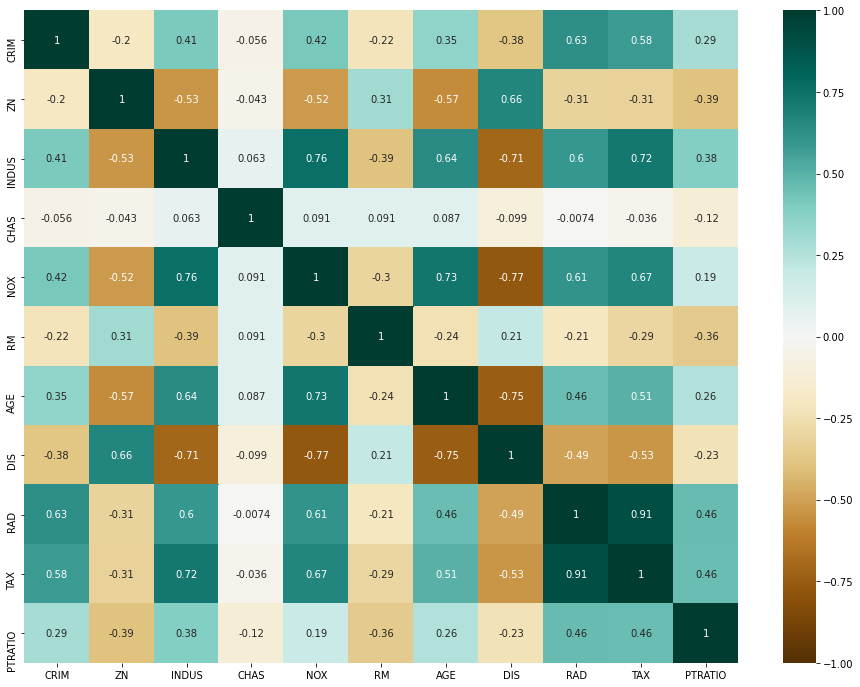

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# imprimimos la matriz como un heatmap
plt.figure(figsize=(16,12));
sns.heatmap(correlation_matrix, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap='BrBG');

Ahora podemos ver de forma mucho más sencilla relaciones lineales como las que existen entre RAD y TAX (índice de accessibilidad a carreteras radiales vs. tasa de impuesto a la propiedad de valor total por U$D 10.000)) o algunas inversas como las que hay entre DIS y NOX (distancias ponderadas a cinco centros de empleo de Boston vs. concentración de óxido nítrico (partes por 10 millones)). 

En algunos de estos casos la relación puede ser obvia o tener algún vinculo con nuestro conocimiento del dominio. Por ejemplo:
* La relación lineal entre RAD y TAX parece indicar que Boston cobra impuestos más altos en las regiones con más acceso a carreteras. ¿Eso será así por decisión pública de la alcaldía, o por coincidencia con alguna otra variable?
* La relación inversa entre DIS y NOX parece indicar que a medida que la distancia respecto a los centros principales de trabajo de la ciudad aumenta, la concentración de contaminantes disminuye. Tiene sentido, teniendo en cuenta que seguramente se trate de centros industriales.

### 5. Análisis gráfico de los datos

El análisis gráfico de los datos suele resultar muy útil, porque nos permite captar de una algunas conclusiones interesantes sobre la forma en la que nuestros datos están distribuidos, sus relaciones, etc.

Existen muchísimas herramientas para analizar graficamente los datos. Acá vamos a ver algunas de las más simples.

Para empezar, trabajaremos con histogramas. En los histogramas graficamos la distribución de los datos, estudiando la frecuencia absoluta o relativa en la que ocurre un determinado valor de variable. Si la variable es contínua, obviamente necesitaremos recurrir a baldes en los que cuantizaremos las diferentes muestras para contar luego cuántas veces se repiten muestras dentro de cada balde.

A continuación, vamos a graficar una feature indicada en la variable ```variable_to_print``` usando ```n_bins``` baldes. Podemos decidir si queremos graficar la frecuencia absoluta o relativa simplemente comentando o descomentando la variable ```relative_frequency```:

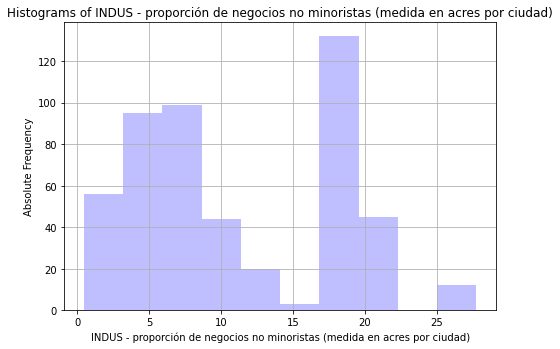

In [ ]:
import matplotlib.pyplot as plt

# comentar o descomentar según querramos ver la frecuencia relativa o la absoluta
#relative_frequency = True
relative_frequency = False

# modificar esta variable con el índice de la feature que se quiere analizar
variable_to_print = 2
# modificar esta variable para determinar el número de baldes que vamos a usar
n_bins = 10
# recuperamos su tag y un string con su tag y descripción
tag = list(feature_labels.keys())[variable_to_print]
feature_id_and_description = tag + ' - ' + feature_labels[tag]

# creamos el canvas de la figura
fig=plt.figure()
# agregamos los ejes
ax=fig.add_axes([0,0,1,1])
# hacemos histogramas de 50 baldes para los datos de entrenamiento, validación y
# test, en los colores azul (b), verde (g) y rojo (r), con cierta transparencia 
# alpha
ax.hist(X[:,variable_to_print], n_bins, density=relative_frequency, facecolor='b', alpha=0.25)
# agregamos las etiquetas de los ejes x e y
ax.set_xlabel(feature_id_and_description)
if relative_frequency:
  ax.set_ylabel('Relative Frequency')
else:
  ax.set_ylabel('Absolute Frequency')
# le colocamos un título
ax.set_title('Histograms of {}'.format(feature_id_and_description))
ax.grid(True)
# lo mostramos por pantalla
plt.show()


Otra forma de estudiar los datos que tenemos es mediante scatter plots (gráficos de dispersión), que nos permiten vincular dos o tres variables y observar en un espacio 2D o 3D qué relación tienen entre sí. Por ejemplo, en esta gráfica observamos la relación entre una feature y la variable objetivo.

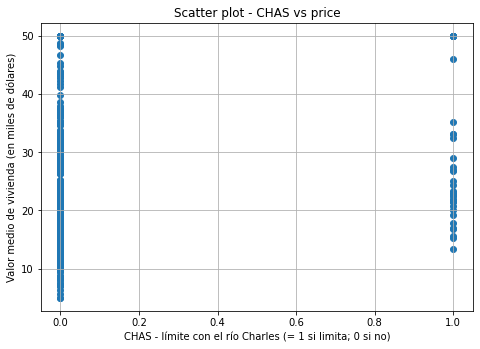

In [ ]:
from matplotlib import pyplot as plt

# modificar esta variable con el índice de la feature que se quiere analizar
variable_to_print = 3
# recuperamos su tag y un string con su tag y descripción
tag = list(feature_labels.keys())[variable_to_print]
feature_id_and_description = tag + ' - ' + feature_labels[tag]
# generamos un scatter plot: por defecto, la variable objetivo la colocamos en 
# el eje Y, y a la variable cuya influencia queremos estudiar la colocamos en el 
# eje X
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(X[:,variable_to_print], y)
ax.grid(True)
ax.set_xlabel(feature_id_and_description)
ax.set_ylabel('Valor medio de vivienda (en miles de dólares)')
ax.set_title('Scatter plot - {} vs price'.format(tag))
plt.show()

Finalmente, también podemos comparar una feature con otra, para estudiar si ambas tienen alguna relación diferente a una meramente lineal. Les dejo 2 opciones, descomenten las líneas que les interese estudiar:

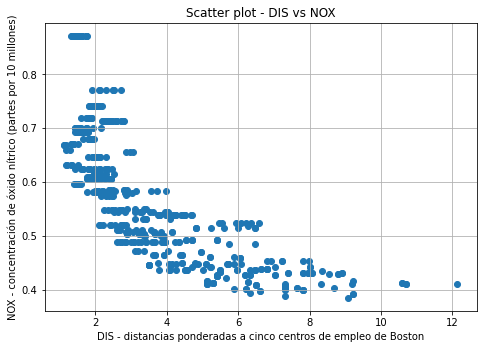

In [ ]:
from matplotlib import pyplot as plt

# modificar esta variable con los índices de las características que queremos
# comparar
#variables_to_compare = [8, 9]
variables_to_compare = [7, 4]
# recuperamos los tags y las descripciones
tags = list([None]) * len(variables_to_compare)
features_ids_and_descriptions = list([None]) * len(variables_to_compare)
for i in range(len(variables_to_compare)):
  tags[i] = list(feature_labels.keys())[variables_to_compare[i]]
  features_ids_and_descriptions[i] = tags[i] + ' - ' + feature_labels[tags[i]]
# generamos un scatter plot
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(X[:,variables_to_compare[0]], X[:,variables_to_compare[1]])
ax.grid(True)
ax.set_xlabel(features_ids_and_descriptions[0])
ax.set_ylabel(features_ids_and_descriptions[1])
ax.set_title('Scatter plot - {} vs {}'.format(tags[0], tags[1]))
plt.show()

Como habrán notado, acá estuvimos trabajando con NumPy. Podemos tranquilamente usar Pandas, también, para generar histogramas o scatter plots. Aunque la funcionalidad más copada de Pandas para esto es la ```scatter_matrix```, que nos resume distribuciones y relaciones entre pares de features todas de una, en un mismo gráfico:

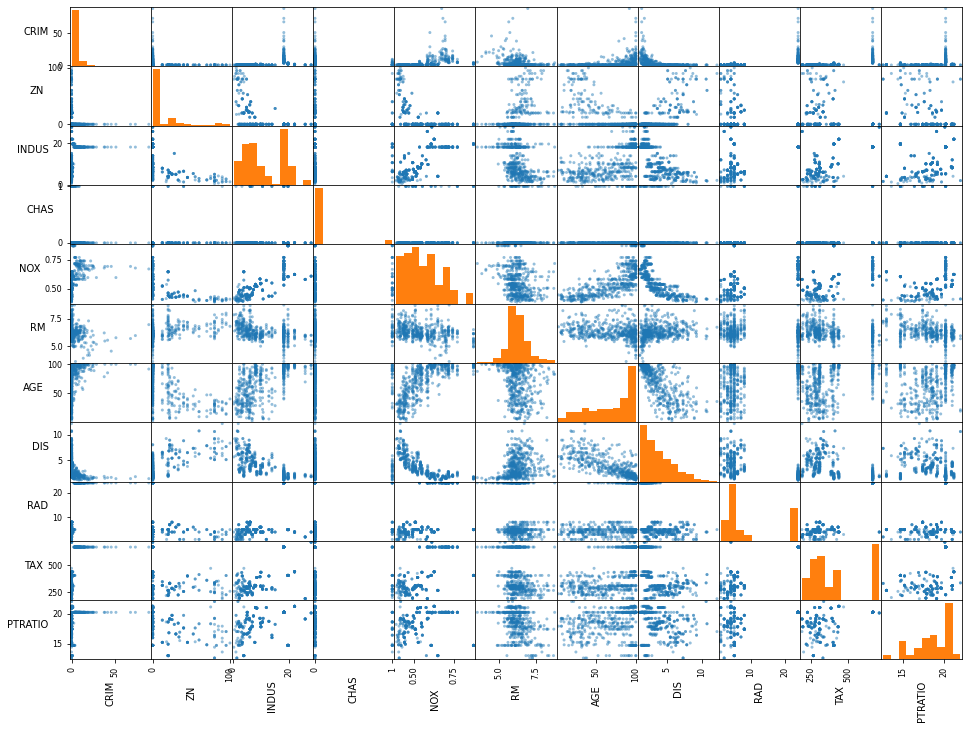

In [ ]:
# importamos la scatter matrix
from pandas.plotting import scatter_matrix

# la mostramos por pantalla
axs = scatter_matrix(X_df, figsize=(16,12), alpha=0.47, hist_kwds={'color':'#ff7f0e'});
# acomodamos la orientación del contenido de los ejes
for i in range(len(X_df.columns)):
  for j in range(len(X_df.columns)):
    ax=axs[i,j]
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

Cambiamos el color de la diagonal para que se vea un poco mejor. Vemos que en la diagonal directamente tenemos representado el histograma con cómo se distribuyen las muestras en cada feature, y en los demás sectores tenemos un scatter plot contrastando una feature con otra. Con este tipo de gráficos es más fácil detectar entradas redundantes y relaciones entre features.

### 6. Particionar los datos

Para realizar un entrenamiento y una evaluación correcta del algoritmo que vamos a diseñar, necesitamos dividir los datos que tenemos en conjuntos de training, validation y test. Si la cantidad de datos fuese muy pequeña, podemos recurrir a técnicas de [k-fold cross-validation](https://www.youtube.com/watch?v=gJo0uNL-5Qw), pero por ahora asumiremos que el dataset que tenemos es suficientemente grande como para entrenar y testear nuestro algoritmo.

Un paso importante para evitar problemas de [data leakage](https://towardsdatascience.com/data-leakage-in-machine-learning-10bdd3eec742) es eliminar datos repetidos. Si tuviéramos variables repetidas, podría ocurrir que al hacer la partición terminen cayendo tanto en entrenamiento como en test. Dos muestras se consideran idénticas si corresponden a mediciones idénticas de un mismo elemento. En nuestro caso, no contamos con identificadores que nos determinen de qué casa particular proviene cada muestra, con lo cual no podemos chequear si la inmobiliaria nos proveyó datos con o sin repetidos. En estos casos, entonces, no podemos establecer ninguna acción correctiva. Si, por el contrario, hubiéramos tenido las casas identificadas, podríamos chequear usando sus IDs si hay elementos repetidos, y la acción correctiva en ese caso hubiese sido eliminar las repeticiones.

Una vez chequeado esto, necesitamos avanzar en el particionado de los datos. Una práctica usual es utilizar un 70% de los datos disponibles para entrenar/validar el algoritmo (training/validation sets), y un 30% para testear el resultado final (test set). Para evitar un sesgo en la selección de nuestros datos, vamos a hacer particiones aleatorias.

In [ ]:
# calculamos la cantidad de muestras de entrenamiento/validación y test
n_trainval = round(0.7 * X.shape[0])
n_test = X.shape[0] - n_trainval

# vamos a generar una secuencia de índices de 0 al total de muestras, con la que
# representaremos cada muestra en nuestra matriz de diseño
idx = list(range(0,X.shape[0]))
print('First 5 indices (without shuffling): {}'.format(idx[0:5]))
# ahora vamos a aleatorizar el orden de esta lista, para que ya no sean 
# consecutivos
random.shuffle(idx)
print('First 5 indices (after shuffling): {}'.format(idx[0:5]))
# si extraemos las primeras n_trainval muestras de X usando los índices
# aleatorizados que hemos generado, esto equivale a tomar unas muestra aleatoria
X_trainval = X[idx[0:n_trainval],:]
y_trainval = y[idx[0:n_trainval]]
X_test = X[idx[n_trainval:],:]
y_test = y[idx[n_trainval:]]
# verificamos sus tamaños
print('Train/val set size: {}'.format(X_trainval.shape))
print('Test set size: {}'.format(X_test.shape))

First 5 indices (without shuffling): [0, 1, 2, 3, 4]
First 5 indices (after shuffling): [111, 417, 399, 408, 383]
Train/val set size: (354, 11)
Test set size: (152, 11)


De ese 70% de datos que separamos para entrenar/validar el algoritmo, nos quedaremos con un 90% para entrenar el algoritmo (training set), y el 10% restante para validar las configuraciones (validation set). Igual que antes, utilizaremos particiones aleatorias.

In [ ]:
# calculamos la cantidad de muestras de entrenamiento y validación
n_train = round(0.9 * X_trainval.shape[0])
n_val = X_trainval.shape[0] - n_train

# si extraemos las primeras n_trainval muestras de X usando los índices
# aleatorizados que hemos generado, esto equivale a tomar unas muestra aleatoria
X_train = X[idx[0:n_train],:]
y_train = y[idx[0:n_train]]
X_val = X[idx[n_train:n_train+n_val],:]
y_val = y[idx[n_train:n_train+n_val]]
# verificamos sus tamaños
print('Training set size: {}'.format(X_train.shape))
print('Validation set size: {}'.format(X_val.shape))
print('Test set size: {}'.format(X_test.shape))

Training set size: (319, 11)
Validation set size: (35, 11)
Test set size: (152, 11)


Se imaginarán que hacer esto a pedal cada vez que recibimos datos... es de gusto. ```sklearn``` nos ofrece una forma mucho más rápida y corta de implementar el proceso de particionado, a través de la funcion ```train_test_split``` del paquete ```model_selection```. Para controlar la aleatoriedad, podemos setear una semilla aleatoria ```random_state``` con un valor fijo, que nos va a asegurar que si repetimos la linea, la partición sea la misma.

Vamos a hacer lo mismo que antes, pero mejor y más rápido, con esta librería:

In [ ]:
from sklearn.model_selection import train_test_split

# sacamos el 30% de las muestras para los datos de test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# y repetimos ahora, pero sacando un 10% para los datos de validación
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, random_state=10)
# verificamos sus tamaños
print('Training set size: {}'.format(X_train.shape))
print('Validation set size: {}'.format(X_val.shape))
print('Test set size: {}'.format(X_test.shape))

Training set size: (318, 11)
Validation set size: (36, 11)
Test set size: (152, 11)


Una vez que tenemos las particiones realizadas, tenemos que chequear si los conjuntos no tienen algún sesgo. Lo más común es estudiar si nuestra variable objetivo (el precio de las casas) se distribuye más o menos parecido en cada conjunto. De esa forma, podemos garantizar que estamos entrenando el algoritmo con distribuciones representativas. Si esto no se cumpliera, debemos hacer un muestreo estratificado de los datos de cada categoría o dentro de determinados rangos, y corregir así las diferencias. Para comparar las distribuciones vamos a utilizar un histograma.

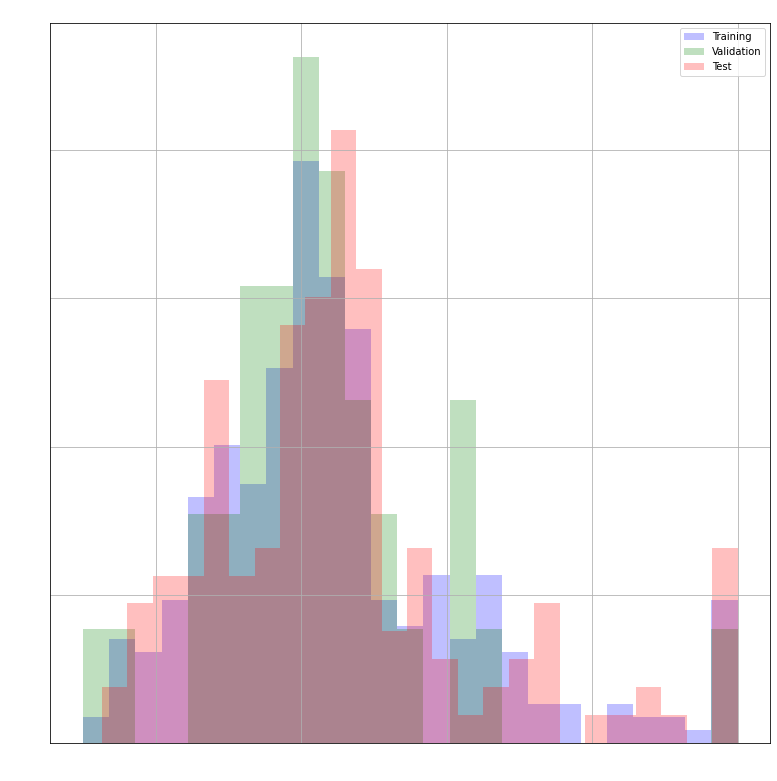

In [ ]:
from matplotlib import pyplot as plt

relative_frequency = True
n_bins = 25

# creamos el canvas de la figura
fig=plt.figure(figsize=(10,10))
# agregamos los ejes
ax=fig.add_axes([0,0,1,1])
# hacemos histogramas de 50 baldes para los datos de entrenamiento, validación y
# test, en los colores azul (b), verde (g) y rojo (r), con cierta transparencia 
# alpha
ax.hist(y_train, n_bins, density=relative_frequency, facecolor='b', alpha=0.25)
ax.hist(y_val, n_bins, density=relative_frequency, facecolor='g', alpha=0.25)
ax.hist(y_test, n_bins, density=relative_frequency, facecolor='r', alpha=0.25)
# agregamos las etiquetas de los ejes x e y
ax.set_xlabel('Median value of owner-occupied homes in $1000s', color='white')
if relative_frequency:
  ax.set_ylabel('Relative Frequency', color='white')
else:
  ax.set_ylabel('Absolute Frequency', color='white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# le colocamos un título
ax.set_title(
    'Histograms of y - Training, validation and test set', 
    color='white'
    )
# agregamos la leyenda
ax.legend(['Training', 'Validation', 'Test'])
ax.grid(True)
# lo mostramos por pantalla
plt.show()

Puede verse que los perfiles de las curvas son más o menos similares, con los valores más frecuentes alrededor del valor 20. Por supuesto el histograma de los datos de entrenamiento es más alto (ya que tiene más datos y por ende la frecuencia absoluta es mucho mayor). Si seteamos ```relative_frequency = True```, generarermos valores de frecuencia normalizados por el tamaño del data set, y absorberemos la variabilidad producto de las diferencias de tamaño.

### 7. Normalización y estandarización de los datos

Trabajar con datos no normalizados facilita interpretar los valores de cada variable, pero afecta significativamente los resultados de los algoritmos. Idealmente, si identificamos que nuestras features viven en rangos muy diferentes unas de otras, debemos aplicar técnicas que nos permitan normalizar los datos y estandarizarlos.

Para evaluar los rangos, podemos tomar el mínimo y máximo por columnas de nuestros datos de entrenamiento, y evaluar lo que obtenemos.

In [ ]:
print('Training set statistics:')
print('Min values: {}'.format(np.min(X_train, axis=0)))
print('Max values: {}'.format(np.max(X_train, axis=0)))

Training set statistics:
Min values: [  0.006   0.      0.46    0.      0.385   3.561   6.      1.137   1.
 187.     12.6  ]
Max values: [ 73.534 100.     27.74    1.      0.871   8.78  100.     12.127  24.
 711.     22.   ]


Puede verse que algunas features tienen rangos muy diferentes entre sí. Esto puede afectar significativamente los resultados más adelante, ya que algunos modelos son sensibles al peso relativo que tienen las features. Por ejemplo, los métodos de clústering más tradicionales analizan las distancias entre las muestras dentro del espacio de features. Una de las formas posibles de medir esa distancia es utilizando la distancia euclidea:

$\begin{equation}d(\mathbf{x}^{(u)}, \mathbf{x}^{(v)}) = \sqrt{\sum_i {(\mathbf{x}_i^{(u)} - \mathbf{x}_i^{(v)})}^2}\end{equation}$

Supongamos que queremos estudiar la distancia entre 3 muestras de 2 features cada una, $\mathbf{x}^{(0)} = [0.1, 10]$, $\mathbf{x}^{(1)} = [0.2,20]$ y $\mathbf{x}^{(2)} = [0.9, 20]$. La feature 1 toma valores en $[0,1]$, y la 2 en $[0, 100]$.



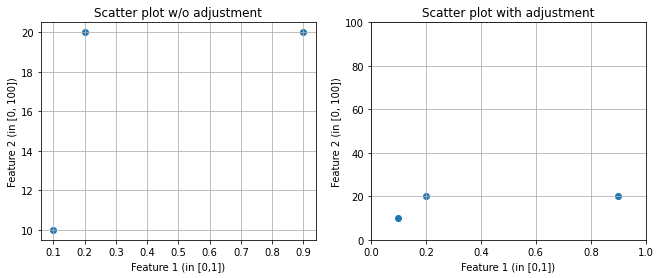

Pairwise Euclidean distances between samples
[[ 0.    10.    10.032]
 [10.     0.     0.7  ]
 [10.032  0.7    0.   ]]


In [ ]:
from scipy.spatial.distance import pdist, squareform

# ponemos todas las muestras en una matriz
why_normalizing_test_samples = np.asarray([[0.1, 10], [0.2, 20], [0.9, 20]])
# vamos a representarlas en dos scatter plots distintos, sin y con ajuste de
# los límites por rangos
fig, (ax1, ax2) =plt.subplots(1, 2)
ax1.scatter(why_normalizing_test_samples[:,0], why_normalizing_test_samples[:,1])
ax1.grid(True)
ax1.set_xlabel('Feature 1 (in [0,1])')
ax1.set_ylabel('Feature 2 (in [0, 100])')
ax1.set_title('Scatter plot w/o adjustment')

ax2.scatter(why_normalizing_test_samples[:,0], why_normalizing_test_samples[:,1])
ax2.grid(True)
ax2.set_xlabel('Feature 1 (in [0,1])')
ax2.set_ylabel('Feature 2 (in [0, 100])')
ax2.set_title('Scatter plot with adjustment')
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 100)
plt.subplots_adjust(left=0.1, right=1.5)
plt.show()

# y ahora vamos a tomar la distancia entre los puntos
print('Pairwise Euclidean distances between samples')
print(squareform(pdist(why_normalizing_test_samples, metric='euclidean')))

En nuestro ejemplo puede verse que la distancia Euclidea entre $\mathbf{x}^{(0)}$ y $\mathbf{x}^{(1)}$ es casi igual a la de $\mathbf{x}^{(0)}$ y $\mathbf{x}^{(2)}$. En principio, y si miráramos un gráfico no controlado como el primer scatter plot, podríamos suponer que esto es correcto. Sin embargo, si ajustamos los rangos del scatter plot de acuerdo a los rangos que puede tomar cada variable, vemos que en realidad $\mathbf{x}^{(0)}$ y $\mathbf{x}^{(1)}$ están muy cerca, mientras que $\mathbf{x}^{(2)}$ está más lejos. Algo parecido pasa entre $\mathbf{x}^{(1)}$ y $\mathbf{x}^{(2)}$: según la distancia Euclidea, en ese caso $\mathbf{x}^{(1)}$ está más cerca de $\mathbf{x}^{(2)}$ que de $\mathbf{x}^{(0)}$, lo cual es incorrecto en el espacio de características! Esto se debe a que estamos asumiendo que los rangos entre las features 1 y 2 son equivalentes. En consecuencia, asumimos que una distancia de 10 en el eje de la feature 2 es enorme, cuando, si consideramos el rango efectivo de la feature, no es tanto.

¿Por qué en el segundo scatter plot vemos el error? Bueno, porque en ese gráfico corregimos las escalas de los ejes x e y para que sean equivalentes. Ahora la distancia entre 0.0 y 0.2 en la feature 1 es la misma que la distancia entre 0 y 20 en la feature 2. 

Matemáticamente, deberíamos hacer la corrección sobre los datos (y no sobre la forma de representarlos visualmente). La forma de hacerlo es **normalizando los datos** aplicando una operación de **feature scaling**, que nos asegura que todas las features vivan en el intervalo [0, 1], independientemente de cuál sea su origen. Para hacerlo, tenemos que aplicar la siguiente ecuación sobre cada columna:

$ x_\text{normalizado} = \frac{x - x_\text{min}}{x_\text{max} - x_\text{min}}$

donde $x$ es el valor de una feature para una determinada muestra, y $x_\text{min}$ y $x_\text{max}$ son los valores mínimo y máximo que puede tomar esa feature, respectivamente.

En nuestro ejemplo ya conocemos los mínimos y máximos teóricos (0 y 1 para la feature 1 y 0 y 100 para la feature 2, respectivamente). Apliquemos, entonces, la normalización:



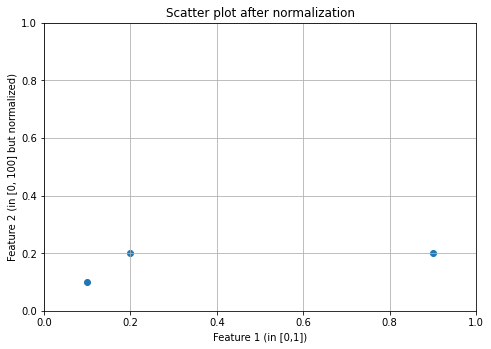

Pairwise Euclidean distances between samples
[[0.    0.141 0.806]
 [0.141 0.    0.7  ]
 [0.806 0.7   0.   ]]


In [ ]:
# creamos variables para los mínimos y máximos teóricos
min_theoretical_values = np.asarray([0, 0])
max_theoretical_values = np.asarray([1, 100])
# aplicamos la operación de feature scaling
normalized_test_samples = (why_normalizing_test_samples - min_theoretical_values) / (max_theoretical_values - min_theoretical_values)
# ahora las graficamos
fig =plt.figure()
ax1=fig.add_axes([0,0,1,1])
ax1.scatter(normalized_test_samples[:,0], normalized_test_samples[:,1])
ax1.grid(True)
ax1.set_xlabel('Feature 1 (in [0,1])')
ax1.set_ylabel('Feature 2 (in [0, 100] but normalized)')
ax1.set_title('Scatter plot after normalization')
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
plt.show()
# y ahora vamos a tomar la distancia entre los puntos
print('Pairwise Euclidean distances between samples')
print(squareform(pdist(normalized_test_samples, metric='euclidean')))

Ahora podemos ver que las distancias en nuestro ejemplo son más coherentes: $\mathbf{x}^{(0)}$ y $\mathbf{x}^{(1)}$ están más cerca entre sí que $\mathbf{x}^{(0)}$ y $\mathbf{x}^{(2)}$, y lo mismo ocurre entre $\mathbf{x}^{(1)}$ y $\mathbf{x}^{(2)}$.

Se imaginarán que este análisis es imposible de hacer cuando el número de dimensiones crece y ya no podemos graficar puntos o controlar sus distancias manualmente. **Por eso es que asumimos siempre como un primer paso importante el corregir las diferencias en los rangos de las features.**

Vamos a aplicar feature scaling sobre los datos reales con los que estamos trabajando. En este caso, como las features no son artificiales si no que vienen de un dominio particular, deberíamos chequear sus definiciones y verificar si conocemos el valor máximo/mínimo que puede tomar cada una:

- **CRIM:** tasa de criminalidad per cápita por ciudad **(no conocemos el valor máximo)**
- **ZN:** **proporción** de tierra residencial (dividida en zonas para lotes de más de 25.000 pies cuadrados)
- **INDUS:** **proportion** proporción de negocios no minoristas (medida en acres por ciudad)
- **CHAS:** límite con el río Charles (= 1 si limita; 0 si no)
- **NOX:** concentración de óxido nítrico (partes por 10 millones) **(el máximo sería 10 millones de partes cada 10 millones? no sabemos!)**
- **RM:** cantidad promedio de habitaciones por vivienda **(no conocemos el valor máximo)**
- **AGE:** proporción de unidades ocupadas por sus propietarios construidas antes de 1940
- **DIS:** distancias ponderadas a cinco centros de empleo de Boston **(no conocemos el valor máximo)**
- **RAD:** índice de accessibilidad a carreteras radiales **(no conocemos el valor máximo)**
- **TAX**: tasa de impuesto a la propiedad de valor total por U$D 10.000 **(no conocemos el valor máximo)**
- **PTRATIO:** tasa alumno/profesor por localidad **(no conocemos el valor máximo)**

Dado que tenemos muchas variables a las que no les conocemos su valor máximo, no podemos normalizarlas utilizando el rango teórico de cada una. La alternativa que nos queda es hacerlo estimando máximos y mínimos a partir de los datos de entrenamiento.

In [ ]:
# calculamos los vectores de valores máximos y mínimos
max_values = np.max(X_train, axis=0)
min_values = np.min(X_train, axis=0)
# a cada fila de la matriz le restamos el valor mínimo y la dividimos por
X_train_norm = (X_train - min_values) / (max_values - min_values)
# chequeamos sus valores máximos y mínimos
print('X_train_norm')
print('Min: {}'.format(np.min(X_train_norm, axis=0)))
print('Max: {}'.format(np.max(X_train_norm, axis=0)))

X_train_norm
Min: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Max: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Podemos ver que las features en los datos de entrenamiento ahora toman todas valores entre 0 y 1.

¿Y qué pasa con los datos de validación y test? Bueno, todos los datos deberían vivir en el mismo espacio de características, o los modelos que entrenemos no serían capaces de trabajar con otros datos diferentes a los que usamos para entrenar. Por ende, tenemos que normalizarlos también. Pero: **importante:** los valores máximos/mínimos que usemos para normalizar sobre cualquier conjunto, si están estimados y no son teóricos, se obtienen sobre los datos de entrenamiento!

In [ ]:
# repetimos en los datos de validación y test
X_val_norm = (X_val - min_values) / (max_values - min_values)
X_test_norm = (X_test - min_values) / (max_values - min_values)
# mostramos los valores máximos y mínimos
print('X_val_norm')
print('Min: {}'.format(np.min(X_val_norm, axis=0)))
print('Max: {}'.format(np.max(X_val_norm, axis=0)))
print('\n\nX_test_norm')
print('Min: {}'.format(np.min(X_test_norm, axis=0)))
print('Max: {}'.format(np.max(X_test_norm, axis=0)))

X_val_norm
Min: [ 0.     0.     0.065  0.     0.031  0.279  0.019 -0.001  0.     0.011
  0.043]
Max: [0.695 0.7   0.786 1.    1.    0.728 1.    0.609 1.    0.914 0.915]


X_test_norm
Min: [ 0.     0.     0.029  0.     0.008  0.111 -0.033  0.004  0.     0.002
  0.043]
Max: [1.21  0.95  1.    1.    1.    0.989 1.    0.871 1.    1.    1.   ]


Puede verse que los rangos quedaron en el intervalo [0, 1] en los datos de entrenamiento, pero no ocurre lo mismo en los datos de validación o test para el caso de algunas variables (que toman valores mayores a 1 o menores a 0). Esto se debe a que algunos valores en nuestros datos de validación y test escapan al rango estimado sobre los datos de entrenamiento. 

Podríamos repetir la normalización utilizando valores estimados a partir de todos los datos, por ejemplo utilizando la matriz de diseño inicial. Sin embargo, esto constituye una fuente de [**data leakage**](https://towardsdatascience.com/data-leakage-in-machine-learning-10bdd3eec742), ya que utilizaríamos información de los datos de test para calibrar nuestro método, con lo cual **esto no se debe hacer**. Por otro lado, no tenemos garantías de que los valores máximos/mínimos que estimemos sobre este conjunto más grande efectivamente sean los de la población real. Este problema se resolvería (o al menos se aliviaría) si pudiéramos capturar una cantidad mucho mayor de datos de entrenamiento que resuma mejor a la población. 

Lamentablemente, no podemos evitar este problema: siempre que estimemos un parámetro o un estadístico vamos a tener un cierto error, y este error lo terminaremos trasladando a cualquier extrapolación que hagamos a partir de esto.

Otro punto importante: las comprobaciones que hicimos las hicimos solamente a fin de estudiar si las operaciones se aplicaron efectivamente sobre los datos, pero no debemos profundizarlas para estudiar por ejemplo su distribución: de lo contrario, estaríamos sacando conclusiones sobre la naturaleza de los datos de validación y test que implicarían otra vez data leakage.

Ahora bien, feature scaling es una de las opciones para corregir las asimetrías entre los datos. La otra (y la más recomendada) es la **estandarización**. En este proceso lo que buscamos es centrar todas nuestras features en una media = 0, y que su desvío estándar sea 1. No las restringimos a un intervalo específico, pero sí les pedimos que estadísticamente su media sea 0 y su desvío 1. Para ello, debemos aplicar la siguiente operación:

$z = \frac{x - \mu}{\sigma}$

donde $x$ es la feature que quiero corregir, $\mu$ es la media de la feature y $\sigma$ es su desvío estándar. Como media y desvío son medidas estadísticas, no puedo asumirlas ideales a partir de la definición de las features si no que debo estimarlas a partir de los datos de entrenamiento.

Con los datos listos, podemos guardarlos para reutilizarlos más adelante. Es importante recordar que tenemos que conservar también la media y el desvío, para luego, al deployar el modelo, poder estandarizar también los nuevos valores de entrada.

In [ ]:
# estimamos media y desvío a partir de los datos de entrenamiento
mu = np.mean(X_train, axis=0)
sigma = np.std(X_train, axis=0)
# los imprimimos para ver cómo eran
print('X_train:')
print('Mean')
print(mu)
print('Std')
print(sigma)
# lo aplicamos sobre los datos de entrenamiento, validación y test
X_train_stand = (X_train - mu) / sigma
# imprimimos los valores que nos quedan ahora
print('\nX_train_stand:')
print('Mean')
print(np.mean(X_train_stand, axis=0))
print('Std')
print(np.std(X_train_stand, axis=0))

# repetimos la operación sobre los datos de validación y test
X_val_stand = (X_val - mu) / sigma
X_test_stand = (X_test - mu) / sigma

# salvamos los datos para usarlos más adelante
import pickle
print('\nSaving {}'.format(path.join(datasets_folder, 'housing_dataset_partitioned.pkl')))
with open(path.join(datasets_folder, 'housing_dataset_partitioned.pkl'), 'wb') as f:
    partitioned_dataset = {'X_train': X_train_stand, 'X_val': X_val_stand, 'X_test': X_test_stand,
                           'y_train': y_train, 'y_val': y_val, 'y_test': y_test,
                           'feature_labels': feature_labels, 'mu': mu, 'sigma': sigma}
    pickle.dump(partitioned_dataset, f)


X_train:
Mean
[  3.682  11.638  11.181   0.075   0.555   6.261  68.234   3.851   9.698
 409.434  18.445]
Std
[  8.25   24.027   6.869   0.264   0.118   0.712  28.357   2.148   8.824
 170.723   2.141]

X_train_stand:
Mean
[ 0. -0.  0. -0. -0. -0. -0.  0.  0.  0.  0.]
Std
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Saving /content/gdrive/My Drive/Colab Notebooks/DUIA/2021/Machine Learning/housing_dataset_partitioned.pkl


Podemos ver ahora cómo nuestras muestras de entrenamiento han quedado centradas, y hemos aplicado el mismo criterio sobre los datos de validación y test. 

Finalmente, vamos a observar cómo quedaron los datos de entrenamiento tras realizar la estandarización:

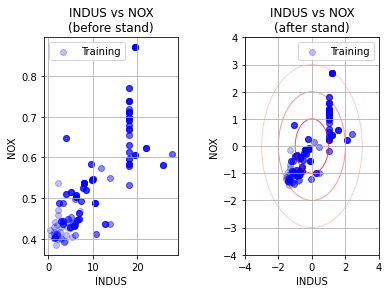

In [ ]:
from matplotlib import pyplot as plt

# modificar esta variable con los índices de las características que queremos
# comparar
variables_to_compare = [2, 4]
tags = list([None]) * len(variables_to_compare)
for i in range(len(variables_to_compare)):
  tags[i] = list(feature_labels.keys())[variables_to_compare[i]]

# generamos un scatter plot con los datos antes de estandarizar
fig, (ax1, ax2) =plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.5)
ax1.scatter(X_train[:,variables_to_compare[0]], X_train[:,variables_to_compare[1]], facecolor='b', alpha=0.25)
ax1.grid(True)
ax1.set_xlabel(tags[0])
ax1.set_ylabel(tags[1])
ax1.legend(['Training'])
ax1.set_title('{} vs {}\n(before stand)'.format(tags[0], tags[1]))

# generamos un scatter plot con los datos estandarizados
ax2.scatter(X_train_stand[:,variables_to_compare[0]], X_train_stand[:,variables_to_compare[1]], facecolor='b', alpha=0.25)
circle1 = plt.Circle((0, 0), 1, color='r', alpha=0.7, fill=False)
circle2 = plt.Circle((0, 0), 2, color='r', alpha=0.4, fill=False)
circle3 = plt.Circle((0, 0), 3, color='r', alpha=0.2, fill=False)
ax2.add_artist(circle1)
ax2.add_artist(circle2)
ax2.add_artist(circle3)
ax2.set_xlim(-4, 4)
ax2.set_ylim(-4, 4)
ax2.grid(True)
ax2.set_xlabel(tags[0])
ax2.set_ylabel(tags[1])
ax2.legend(['Training'])
ax2.set_title('{} vs {}\n(after stand)'.format(tags[0], tags[1]))

plt.show()

Las elipses rojas concéntricas representan $\sigma$, $2\sigma$ y $3\sigma$, que se espera que capturen un 90%, 95% y 99% de los datos, respectivamente. Podemos ver que la estandarización nos centró cerca del 0, y que efectivamente nuestros datos están contenidos dentro de los valores de desvíos esperados. Podríamos repetir este proceso para otros pares de features y observar también un comportamiento similar.



### 8. Reducción de dimensionalidad

Las técnicas de reducción de dimensionalidad permiten tomar vectores de características con $n$ variables y proyectarlos en vectores de $p$ variables, con $n > p$. 

Este tipo de algoritmos puede servir, por ejemplo, para estudiar visualmente la distribución de todos los datos, proyectando las $n$ features a $p=2$ y graficando las proyecciones en un espacio. 

En general, los que más se usan son 3:

* Principal Component Analysis (PCA): que se usa no solamente para graficar, si no también para achicar espacios de características (y evitar la *maldición de la dimensionalidad*).

* t-SNE y UMAP: que se usan para graficar datos multidimensionales.

En las próximas subsecciones vamos a usar algunos de esos algoritmos.

#### 8.1. Principal Component Analysis (PCA)

Una de las técnicas más utilizadas para reducción de dimensionalidad es el [análisis de componentes principales (Principal Component Analysis, PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis). A continuación aplicaremos PCA sobre todas nuestras features para mapear los datos de entrenamiento a un espacio 2D, y graficar los precios de las viviendas en ese espacio de 2 (nuevas) características proyectadas de las actuales.

Before PCA: (318, 11)
After PCA: (318, 2)


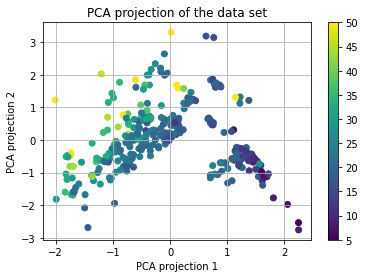

In [ ]:
# importamos la librería de PCA
from sklearn.decomposition import PCA

# declaramos un objeto PCA que mapee n dimensions a p=2, y que además
# normalice esas features (whiten=True)
pca = PCA(n_components=2, whiten=True)
# le pedimos al objeto que se ajuste utilizando los datos de entrenamiento
pca = pca.fit(X_train_stand)
# aplicamos la transformación aprendida sobre los datos de entrenamiento
X_train_stand_pca = pca.transform(X_train_stand)
# imprimimos los tamaños antes y después
print('Before PCA: {}'.format(X_train_stand.shape))
print('After PCA: {}'.format(X_train_stand_pca.shape))

# graficamos los datos. el color de cada punto representa el valor de la casa
plt.scatter(X_train_stand_pca[:,0], X_train_stand_pca[:,1], c=y_train, cmap='viridis')
plt.grid(True)
plt.xlabel('PCA projection 1')
plt.ylabel('PCA projection 2')
plt.title('PCA projection of the data set')
plt.colorbar()
plt.show()

Podemos ver que en general hay una evolución de derecha a izquierda de los precios. Esto en principio nos dice que hay algún tipo de relación entre los datos y los precios. Algunas muestras (las de las casas más caras) ocurren en diferentes lugares de este espacio proyectado, lo que podría indicar que esos precios quizá se asignen siguiendo alguna característica que no está incluida en nuestro conjunto de datos.

#### 8.2. t-distributed Stochastic Neighbor Embedding (t-SNE)

[t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) se suele usar muchísimo en papers, para representar graficamente por ejemplo el espacio de características aprendido por una red neuronal o un autoencoder. Se los recomiendo cuando quieran, por ejemplo, indicar que su espacio de características puede distinguir $K$ clases con cierta eficacia.

A continuación vamos a simplemente generar una representación t-SNE para los datos con los que estamos trabajando. Tengan en cuenta que usaremos la implementación de ```sklearn```, que aunque parezca muy rápida para las pocas muestras que tenemos, tarda banda cuando la cantidad de muestras es muy grande. Si necesitan algo más eficiente, les recomiendo [esta implementación](https://github.com/CannyLab/tsne-cuda) que usa GPU.

Before t-SNE: (318, 11)
After t-SNE: (318, 2)


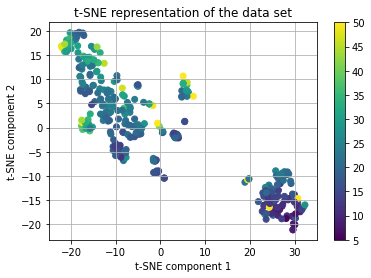

In [ ]:
# importamos el t-SNE
from sklearn.manifold import TSNE

# creamos el objeto, lo fitteamos en nuestros datos y lo aplicamos sobre esos mismos
#X_train_stand_tsne = TSNE(n_components=2).fit_transform(X_train_stand) # sin random state
X_train_stand_tsne = TSNE(n_components=2, random_state=10).fit_transform(X_train_stand)  # con random state
# imprimimos los tamaños antes y después
print('Before t-SNE: {}'.format(X_train_stand.shape))
print('After t-SNE: {}'.format(X_train_stand_tsne.shape))

# graficamos los datos, el color de cada punto representa el valor de la casa
plt.scatter(X_train_stand_tsne[:,0], X_train_stand_tsne[:,1], c=y_train, cmap='viridis')
plt.grid(True)
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.title('t-SNE representation of the data set')
plt.colorbar()
plt.show()

Si hacemos varias corridas vamos a observar que los resultados son diferentes. Esto es porque el proceso de inferencia del embedding que estamos graficando es estocástico, lo que implica que hay una aleatoriedad que no podemos controlar. Si usamos una variable ```random_state``` vamos a obtener siempre la misma proyección. Recomendamos eso cuando estén laburando en algún paper.

Acá no es tan fácil como antes observar una relación entre los precios y las características. Si ejecutan la línea que tiene la semilla aleatoria, van a ver que en el resultado se observan 2 grupos de muestras. Un grupo (el de la derecha) tiene una concentración alta de casas con precios bajos, y algunos outliers con precios altos. En el grupo de la izquierda, vemos un degradé que crece hacia la izquierda y la derecha, lo que implica también un cambio en los precios. De todas formas, no es tan evidente, ¿no?

#### 8.3. Uniform Manifold Approximation and Projection (UMAP)

[UMAP](https://towardsdatascience.com/how-exactly-umap-works-13e3040e1668) es otro algoritmo alternativo a t-SNE para generar visualizaciones de datos con alta dimensionalidad. Es algo más reciente y se ha puesto de moda últimamente, aunque los resultados de uno y otro suelen ser muy compatibles.

Al ser tan nuevo, todavía no está implementado en ```sklearn```, con lo que vamos a tener que instalar [una librería aparte que lo implementa](https://umap-learn.readthedocs.io/en/latest/index.html).

In [ ]:
!pip install umap-learn

     |████████████████████████████████| 81kB 3.9MB/s 
     |████████████████████████████████| 1.2MB 9.7MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=fd4f74abbb128e8b80bfb5f19050ab925daa930c1fc261601f9f8c0eadb89b75
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51351 sha256=d19d0e487f6742f4cc529efb5b016931c6e658a4bffea9963a25c56b5380f09a
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent


Para utilizarlo no tenemos más que importar la clase, crear una instancia, fittearla y aplicarla sobre nuestros datos como hicimos antes con t-SNE:

Before UMAP: (318, 11)
After UMAP: (318, 2)


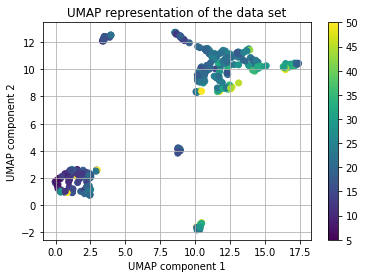

In [ ]:
# importamos umap
import umap

# creamos el objeto, lo fitteamos en nuestros datos y lo aplicamos sobre esos mismos
X_train_stand_umap = umap.UMAP(n_components=2).fit_transform(X_train_stand)
# imprimimos los tamaños antes y después
print('Before UMAP: {}'.format(X_train_stand.shape))
print('After UMAP: {}'.format(X_train_stand_umap.shape))

# graficamos los datos, el color de cada punto representa el valor de la casa
plt.scatter(X_train_stand_umap[:,0], X_train_stand_umap[:,1], c=y_train, cmap='viridis')
plt.grid(True)
plt.xlabel('UMAP component 1')
plt.ylabel('UMAP component 2')
plt.title('UMAP representation of the data set')
plt.colorbar()
plt.show()

En el gráfico resultante vemos que acá se distinguen más grupos de muestras que en el otro caso. Grupos pequeños de casas baratas, otro de casas más caras, y finalmente dos grupos más grandes, uno con casas baratas y otro con degradé de precios. 

Y bueno, con esto tenemos casi todo listo para empezar a tratar nuestros propios datos, y utilizarlos para resolver nuevos problemas. Pero eso lo veremos en las próximas clases :)